<img src="./imagenes/logoucm.png" style="height: 100px">
<center style="color:#888">Módulo 4: Python Básico<br/></center>
<center style="color:#888">Alicia Mayorga Caballero<br/></center>

<h1><center>Spotify Stats</center></h1>

### Motivación
Spotify es la aplicación de música más utilizada en todo el mundo y la mayoría de la gente habrá escuchado hablar del Spotify Wrapped. Un resumen de las canciones que has escuchado en el año. Qué género escuchaste más, a qué artista, incluso si la música que más escuchaste fue música alegre o triste. 

Este Spotify Wrapped no es más que el análisis de datos en estado puro. Spotify registra todas las canciones que has escuchado, tiene todas las playlist que se han creado, etc, para después buscar tendencias, métricas que le ayuden, por ejemplo, en sus recomendaciones de música o como venimos contando para darnos nuestro resumen del año.

Pero esto no acaba aquí. Spotify ofrece una API para que cualquiera pueda hacer su propio análisis de su gigantesca base de datos. Eso sí, ya veremos que para el analista de iniciación habrá límites en el acceso.

En este proyecto se tratará de obtener los datos a través de la api y la librería spotipy y ejecutar consultas que fácilmente podrían aparecer en el próximo Wrapped. A su vez se ofrecerán dos formas de representación gráfica y una introducción al uso de paneles de interacción con un usuario.

# 0. Importación de librerías

Importamos algunas funciones definidas.

In [1]:
from codigo.mi_spotify import *

# 0.1. Conexión  a la api de spotify

Spotify nos permite acceder a su base de datos a través de una api. Para poder trabajar con ella, debemos crearnos una cuenta en spotify como desarrolladores en su página [web](https://developer.spotify.com/documentation/web-api).

Primero requerimos de un token de acesso, donde se verifican nuestras credenciales. Necesitaremos cuestro ID de cliente y un ID secreto personal.

In [2]:
# ID del cliente
CLIENT_ID = 'a9e85172d66a40979eb84a5215322c4d67'
CLIENT_SECRET = '78bfadb1428a42pd80f5afc01f4c73ty45'          # código secreto personal

Los ID anteriores no son los utilizados en la ejecución del código, son un ejemplo.

In [3]:
access_token = spotify_token(CLIENT_ID, CLIENT_SECRET)

Access token obtained successfully.


# 1. Obtención de los datos

Una primera forma de empezar a obtener nuestros datos que después utilizaremos para realizar consultas es a través de una playlist. 

<div style="background-color:#EBF5FB; padding:10px">
<p style="color:#000000">
    - Url de nuestra playlist: https://open.spotify.com/playlist/<strong>37i9dQZEVXbMDoHDwVN2tF</strong>?si=9cc14d6bec304a8d
</p>
<p>
    - Nuestro <strong>id de la playlist</strong> será: 37i9dQZEVXbMDoHDwVN2tF
    </p>
</div>

Es importante conocer como funciona la librería de spotipy, para saber que datos vamos a poder obtener.

- Documentación de la librería [spotipy](https://spotipy.readthedocs.io/en/2.22.1/#)

Lamentablemente la api de spotify solo nos permite obtener 100 canciones de una playlist. Aunque podríamos ir guardando de 100 en 100, asegurándonos que no se tienen canciones repetidas.

He decidido hacer una selección de varias playlists propias sabiendo que no habrá canciones repetidas para poder trabajar con más registros.

In [4]:
playlist1 = '5XE37VX1Q4ITDOauCBUAJk'
playlist2 = '6yc4vVAfrLe03ZNENcqGvA'
playlist3 = '4dHZj8pwR5ew2bB9XSmkLj'
playlist4 = '0SOGENjGVvhPIw53Zf8Y8s'
playlist5 = '5XubLf3m1EyFJ8KNlzDWRe'

-------------------------------------

Obtenemos y damos forma a los datos utilizando la función definida `get_playlist_data()`:

In [5]:
import time
inicio = time.time()

data1 = get_playlist_data(playlist1, access_token)
data2 = get_playlist_data(playlist2, access_token)
data3 = get_playlist_data(playlist3, access_token)
data4 = get_playlist_data(playlist4, access_token)
data5 = get_playlist_data(playlist5, access_token)

fin = time.time()
print(fin-inicio)  # segundos de ejecución

110.44290614128113


Unimos todas nuestras listas de canciones.

In [6]:
music_data = data1 + data2 + data3 + data4 + data5

In [7]:
type(music_data)

list

In [8]:
len(music_data)

378

Vemos que el tipo de dato que obtenemos es una lista de diccionarios con 378 canciones.

# 1.1. Tratamiento del dato

Vamos a trabajar con pyspark. Para ello guardaremos nuestro nuevo conjunto de datos es un archivo de tipo .json

<div style="background-color:#ffe45e; padding:10px">
<p style="color:#000000">
    **¡CUIDADO!** Trabajar con spark tiene requerimientos como contar con Java. Se ha de comprobar que se cumplen todas las condiciones si se quiere correr el siguiente código.
</p>
</div>

In [9]:
import pyspark
import json

Iniciamos la sesión es Spark.

In [10]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

In [11]:
# Guardar en un archivo JSON
with open('./DATA/datos.json', 'w') as json_file:
    json.dump(music_data, json_file)

In [12]:
with open('./DATA/datos.json', 'r') as json_file:
    loaded_data = json.load(json_file)

In [13]:
df = spark.read.json('./DATA/datos.json')

Tenemos cargados nuestros datos en un dataframe de Spark.

In [14]:
df.show(3)

+------------+--------------------+--------------------+--------------+------------+-------------+------+--------+--------------------+----------------+---+--------+--------+----+----------+------------+-----------+------+--------------------+--------------------+-------+
|Acousticness|            Album ID|          Album Name|       Artists|Danceability|Duration (ms)|Energy|Explicit|       External URLs|Instrumentalness|Key|Liveness|Loudness|Mode|Popularity|Release Date|Speechiness| Tempo|            Track ID|          Track Name|Valence|
+------------+--------------------+--------------------+--------------+------------+-------------+------+--------+--------------------+----------------+---+--------+--------+----+----------+------------+-----------+------+--------------------+--------------------+-------+
|       0.181|3R3x4zIabsvpD3yxq...|     An Innocent Man|    Billy Joel|       0.637|       217907| 0.333|   false|https://open.spot...|             0.0|  3|   0.147|  -9.603|   1|  

Para ver de una forma más 'bonita' nuestro diccionario utilizamos la función definida `print_one()`:

In [15]:
print_one(df)

Primer registro:
{
  "Acousticness": 0.181,
  "Album ID": "3R3x4zIabsvpD3yxqLaUpc",
  "Album Name": "An Innocent Man",
  "Artists": "Billy Joel",
  "Danceability": 0.637,
  "Duration (ms)": 217907,
  "Energy": 0.333,
  "Explicit": false,
  "External URLs": "https://open.spotify.com/track/5DH7nDryMhpixm4G4B7RP9",
  "Instrumentalness": 0.0,
  "Key": 3,
  "Liveness": 0.147,
  "Loudness": -9.603,
  "Mode": 1,
  "Popularity": 68,
  "Release Date": "1983-08-08",
  "Speechiness": 0.0262,
  "Tempo": 84.347,
  "Track ID": "5DH7nDryMhpixm4G4B7RP9",
  "Track Name": "The Longest Time",
  "Valence": 0.588
}


# 2. Consultas

In [16]:
import pyspark.sql.functions as f

Nuestros datos cuentan con un valor 'Mode' que toma valores 0 o 1 y que hace referencia a si la escala es menor o mayor.
Nos preguntamos entonces si la escala es un factor determinante en otras variables de interés como pueden ser la popularidad de la canción o la bailabilidad de la misma.

In [17]:
df_resultado = df.groupby('Mode').agg(
    f.mean('Popularity').alias('Promedio_Popularidad'),
    f.mean('Danceability').alias('Promedio_Bailabilidad')
)

# Mostrar el resultado
df_resultado.show()

+----+--------------------+---------------------+
|Mode|Promedio_Popularidad|Promedio_Bailabilidad|
+----+--------------------+---------------------+
|   0|  32.224242424242426|   0.6761460606060609|
|   1|   38.16431924882629|    0.639845070422535|
+----+--------------------+---------------------+



<div style="background-color:#ebf5df; padding:10px">
<p style="color:#000000">
    Vemos que en media, las canciones en escala menor tienen ligeramente menos popularidad pero son más bailables.
</p>
</div>

----

Siguiendo un poco con el tema de la popularidad, de las 378 canciones, ¿cuántas superan una popularidad del 80%?¿Y 90%?

In [18]:
# Filtrar las canciones que superan el 80% de popularidad
df_populares = df.filter(f.col('Popularity') > 80)

# Contar el número de canciones que cumplen la condición
num_canciones_populares = df_populares.count()

# Mostrar el resultado
print(f"Número de canciones con popularidad superior al 80%: {num_canciones_populares}")

Número de canciones con popularidad superior al 80%: 13


Si queremos saber que canciones en concreto:

In [19]:
# Filtrar las canciones que superan el 80% de popularidad
df_populares = df.filter(f.col('Popularity') > 80)

# Seleccionar solo la columna 'Track Name'
df_titulos = df_populares.select('Track Name')

# Mostrar la lista de títulos
lista_titulos = [row['Track Name'] for row in df_titulos.collect()]

# Mostrar resultados
for titulo in lista_titulos:
    print(titulo)

Uptown Girl
I Can't Handle Change
Heather
Infinity
Freaks
deja vu
What A Time (feat. Niall Horan)
Happier Than Ever
This Side of Paradise
Notion
Heartbreak Anniversary
Boyfriend
Tiroteo - Remix


In [20]:
# Filtrar las canciones que superan el 90% de popularidad
df_populares = df.filter(f.col('Popularity') > 90)

# mostrar 
df_populares

# Contar el número de canciones resultantes
num_canciones_populares = df_populares.count()

# Mostrar el resultado
print(f"Número de canciones con popularidad superior al 90%: {num_canciones_populares}")

Número de canciones con popularidad superior al 90%: 0


<div style="background-color:#ebf5df; padding:10px">
<p style="color:#000000">
    Con esto podemos concluir que la mayoría de las canciones no superan el 80% y ninguna el 90%
</p>
</div>

Recordemos que son canciones sacadas de playlists propias,  es decir, lo que obtenemos es información detallada sobre los gustos personales. Esto es muy interesante pues a gran escala un estudio como este nos podría permitir estudiar a los usuarios de cierta aplicación de música y ofrecerle, por ejemplo, mejores recomendaciones musicales.

-----

Si queremos ver más información, por ejemplo, sobre las canciones con el nivel de positividad > 0.70 ordenados por popularidad.

In [21]:
# Realiza la consulta y selecciona las columnas requeridas
consulta = (
    df
    .filter(f.col("Valence") > 0.70)
    .select("Track Name", "Artists", "Popularity", "Valence")
)

# Ordena el DataFrame resultante por popularidad de forma descendente
consulta = consulta.orderBy(f.desc("Popularity"))

# Muestra el resultado
consulta.show(truncate=False)

+---------------------------------+---------------------------------------------------------------------+----------+-------+
|Track Name                       |Artists                                                              |Popularity|Valence|
+---------------------------------+---------------------------------------------------------------------+----------+-------+
|Uptown Girl                      |Billy Joel                                                           |82        |0.792  |
|Beautiful Girls                  |Sean Kingston                                                        |80        |0.769  |
|Sola (Remix)                     |Anuel AA, Daddy Yankee, Zion & Lennox, Farruko, Wisin                |78        |0.767  |
|December, 1963 (Oh What a Night!)|Frankie Valli & The Four Seasons                                     |76        |0.967  |
|Con Altura                       |ROSALÍA, J Balvin, El Guincho                                        |75        |0.746  |


-----------

Una visión algo más estadística sería obtener estadísticos interesantes como la media y también, conocer el mínimo y el máximo de nuestras variables numéricas referidas a características de las canciones.

In [22]:
# Variables numéricas
numeric_columns = ['Acousticness', 'Danceability', 'Duration (ms)', 'Energy', 'Instrumentalness',
                   'Liveness', 'Loudness', 'Popularity', 'Speechiness', 'Tempo', 'Valence']

# Mostrar el máximo y mínimo de cada columna
mean_max_min_values = []

for c in numeric_columns:
    max_value = df.select(f.col(c)).agg({"*": "max"}).collect()[0][0]
    min_value = df.select(f.col(c)).agg({"*": "min"}).collect()[0][0]
    mean_value = df.select(f.col(c)).agg({"*": "mean"}).collect()[0][0]
    mean_max_min_values.append((c, max_value, min_value, mean_value))

# Mostrar los resultados
for column, max_value, min_value, mean_value in mean_max_min_values:
    print(f"Variable {column}--> Máximo: {max_value}, Mínimo: {min_value}, Media: {mean_value}")

Variable Acousticness--> Máximo: 0.983, Mínimo: 2.49e-05, Media: 0.32884487380952365
Variable Danceability--> Máximo: 0.956, Mínimo: 0.0, Media: 0.6556907407407409
Variable Duration (ms)--> Máximo: 516893, Mínimo: 9439, Media: 202745.52645502647
Variable Energy--> Máximo: 0.973, Mínimo: 0.00562, Media: 0.6203238624338628
Variable Instrumentalness--> Máximo: 0.969, Mínimo: 0.0, Media: 0.09221600407407407
Variable Liveness--> Máximo: 0.799, Mínimo: 0.0251, Media: 0.16422169312169307
Variable Loudness--> Máximo: -1.387, Mínimo: -35.66, Media: -7.934417989417988
Variable Popularity--> Máximo: 90, Mínimo: 0, Media: 35.57142857142857
Variable Speechiness--> Máximo: 0.614, Mínimo: 0.0, Media: 0.11741798941798934
Variable Tempo--> Máximo: 202.847, Mínimo: 0.0, Media: 120.64997883597879
Variable Valence--> Máximo: 0.973, Mínimo: 0.0, Media: 0.5019499999999999


<div style="background-color:#ebf5df; padding:10px">
<p style="color:#000000">
    Algunos aspectos que podemos destacar:
    
        -    Acousticness:   un valor muy alto implica que la canción es totalmente acústica. En este caso, en media las
                             canciones no son tan acústicas.
        -    Danceability:   en media vemos que las canciones son bastante bailables.
        -    Valence:        mide el nivel de positividad de la canción. Nosotros hemos obtenido de media un 0.5, 
                             es decir ni más positivas ni más negativas.
</p>
</div>

-------------------------------------------------

Busquemos ahora un top 5 de artistas con más canciones y su media de popularidad.

In [23]:
resultados = df.groupBy("Artists").agg(
    f.avg("Popularity").alias("Media_Popularidad"),
    f.count("Artists").alias("Num_Canciones")
)

# Ordena por el número de canciones de forma descendente y muestra el Top 5
top5_resultados = resultados.orderBy("Num_Canciones", ascending=False).limit(5)

# Muestra los resultados
top5_resultados.show()

+--------------------+------------------+-------------+
|             Artists| Media_Popularidad|Num_Canciones|
+--------------------+------------------+-------------+
|   Random Encounters|             17.88|           25|
|               Blake|             0.125|            8|
|Logan Hugueny-Cla...|21.142857142857142|            7|
|        Jaewook Kang|3.1666666666666665|            6|
|                 WOS|26.833333333333332|            6|
+--------------------+------------------+-------------+



¿Y al revés? Un top 5 en popularidad.

In [24]:
# Encuentra la máxima popularidad 
max_popularity = df.groupBy("Artists").agg(
    f.max("Popularity").alias("Max_Popularity")
)

# Ordena por la máxima popularidad de forma descendente y muestra el Top 5
top5_resultados = max_popularity.orderBy("Max_Popularity", ascending=False).limit(5)

# Muestra los resultados
top5_resultados.show()

+------------------+--------------+
|           Artists|Max_Popularity|
+------------------+--------------+
|        Conan Gray|            90|
|    Olivia Rodrigo|            88|
|        Surf Curse|            87|
|     Billie Eilish|            87|
|The Rare Occasions|            84|
+------------------+--------------+



# 3. Análisis gráfico

Como curiosidad, podemos transformar nuestros datos a pandas y mostrar algún gráfico interesante.

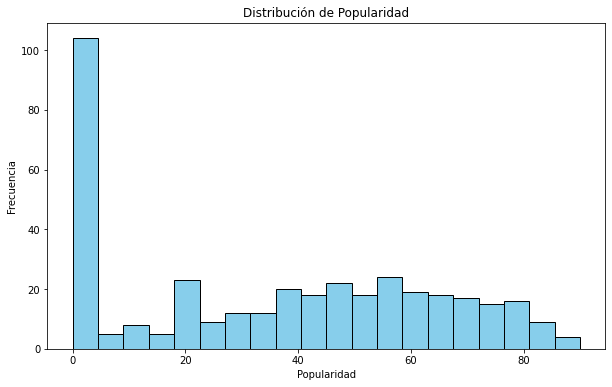

In [25]:
import matplotlib.pyplot as plt

df_pandas = df.toPandas()

# Grafico de histograma para la columna 'Popularity'
plt.figure(figsize=(10, 6))
plt.hist(df_pandas['Popularity'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribución de Popularidad')
plt.xlabel('Popularidad')
plt.ylabel('Frecuencia')
plt.show()

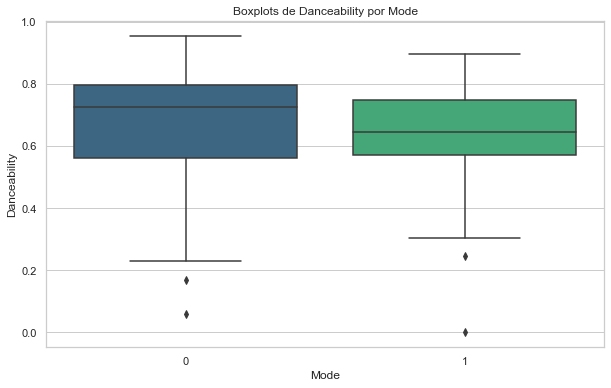

In [26]:
import seaborn as sns

df_pandas = df.toPandas()

# Configura el estilo de seaborn
sns.set(style="whitegrid")

# Grafico de boxplots para 'Danceability' segmentado por 'Mode'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Mode', y='Danceability', data=df_pandas, palette='viridis')
plt.title('Boxplots de Danceability por Mode')
plt.xlabel('Mode')
plt.ylabel('Danceability')
plt.show()

# 4. Panel interactivo

Como tarea para ampliar, se ha intentado crear un panel interactivo con la librería `panel`. Dada una canción el panel nos muestra el artista, sus géneros y su popularidad.

Sería interesante, dado un ID de playlist poder mostrar resultados como nuestro estudio anterior.

Vamos a intentar crear un panel donde al meter una canción nos muestre información.

La api de spotify no nos permite acceder a ID de usuario por privacidad, así que solo podemos con ID de playlists o utilizando una funcionalidad de la librería spotipy `search` para buscar por la canción.

In [27]:
# pip install panel
import panel as pn

In [28]:
import panel as pn

sp = spotipy.Spotify(auth=access_token)

# Cargar la extensión de Panel
pn.extension()

# Crear widgets
search_box = pn.widgets.TextInput(name='Buscar canción', value='')
search_button = pn.widgets.Button(name='Buscar')

# Crear paneles vacíos para mostrar información
track_info_pane = pn.pane.Markdown("Información de la canción:")
artist_info_pane = pn.pane.Markdown("Información del artista:")

# Definir funciones de búsqueda y actualización
def search_track(event):
    query = search_box.value
    results = sp.search(q=query, type='track', limit=1)

    if results['tracks']['items']:
        track = results['tracks']['items'][0]
        track_name = track['name']
        artists = ', '.join([artist['name'] for artist in track['artists']])
        popularity = track['popularity']
        
        track_info = f"**Canción:** {track_name}\n**Artistas:** {artists}\n**Popularidad:** {popularity}%"
        track_info_pane.object = track_info

        artist_id = track['artists'][0]['id']
        artist = sp.artist(artist_id)
        artist_name = artist['name']
        genres = ', '.join(artist['genres'])
        
        artist_info = f"**Artista:** {artist_name}\n**Géneros:** {genres}"
        artist_info_pane.object = artist_info
    else:
        track_info_pane.object = "No se encontró ninguna canción."

# Conectar la función de búsqueda al botón
search_button.on_click(search_track)

# Crear el layout del dashboard
dashboard = pn.Column(
    "# Spotify Dashboard",
    search_box,
    search_button,
    track_info_pane,
    artist_info_pane
)

# Abrir el dashboard en una nueva pestaña
dashboard.show(embed=True)


Launching server at http://localhost:64690


El panel nos sale en una nueva pestaña y los resultados se verían de la siguiente forma:

![title](./imagenes/im1.png)

![title](./imagenes/im2.png)

# 5. Conclusiones

Con este estudio hemos podido observar algunas características interesantes de una serie de playlists. 
- Hemos visto que canciones en escala menor eran más populares que en escala mayor.
- Hemos podido mostrar top de canciones en función de variables como la popularidad o el nivel de positividad.
- Obtener máximo y mínimos, además de ordenar registros según el número de canciones del artista.

En resumen, con este estudio se pretende mostrar herramientas y formas para estudiar los gustos de un usuario en una aplicación de música como es Spotify. Esto puede llegar a permitir mejoras en campañas de marketing, en sistemas de recomendación de canciones al usuario o incluso en la composición de canciones. 

Lo que está claro es que el análisis de datos, y en concreto, el análisis de los gustos del cliente es un campo clave para las empresas de cualquier sector, incluso el de la música.

Para finalizar se muestran un par de ejemplo sobre como mostrar resultados gráficamente y se deja abierta la continuación del panel de interacción con el usuario.